![SegmentLocal](../../assets/images/Logo2.png)

# Parametric and Non-Parametric Analysis 



In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Simulate data

In [37]:
data = {
    'A1_B1': np.random.normal(-1, 1, 50),
    'A1_B2': np.random.normal(0.5, 1.5, 50),
    'A2_B1': np.random.normal(0, 3, 50),
    'A2_B2': np.random.normal(1, 2.5, 50),
    'obs_nr':np.arange(0, 50, 1)
}
sim_df = pd.DataFrame.from_dict(data)

sim_df.head()

,A1_B1,A1_B2,A2_B1,A2_B2,obs_nr
0,-1.299500,1.639972,-0.736049,-2.392883,0
1,-0.229958,-1.726937,-0.166616,0.474043,1
2,-1.067245,-1.781321,2.179602,-4.483174,2
3,-1.026195,-0.047496,2.558128,4.060119,3
4,-0.928566,1.231134,2.722769,-0.412842,4


In [38]:
sim_df = pd.melt(
    sim_df,
    id_vars='obs_nr',
    value_vars = ['A1_B1', 'A1_B2', 'A2_B1', 'A2_B2'],
    value_name = 'score',
    var_name = 'category'
)

sim_df.head()

,obs_nr,category,score
0,0,A1_B1,-1.299500
1,1,A1_B1,-0.229958
2,2,A1_B1,-1.067245
3,3,A1_B1,-1.026195
4,4,A1_B1,-0.928566


In [39]:
sim_df[['category_A', 'category_B']] = sim_df.category.str.split('_', expand=True)

sim_df.head()

,obs_nr,category,score,category_A,category_B
0,0,A1_B1,-1.299500,A1,B1
1,1,A1_B1,-0.229958,A1,B1
2,2,A1_B1,-1.067245,A1,B1
3,3,A1_B1,-1.026195,A1,B1
4,4,A1_B1,-0.928566,A1,B1


In [40]:
sim_df.drop(columns=['category'], inplace=True)
sim_df.head()

,obs_nr,score,category_A,category_B
0,0,-1.299500,A1,B1
1,1,-0.229958,A1,B1
2,2,-1.067245,A1,B1
3,3,-1.026195,A1,B1
4,4,-0.928566,A1,B1


In [41]:
sim_df.category_B.value_counts()

B1    100
B2    100
Name: category_B, dtype: int64

<AxesSubplot:ylabel='Frequency'>

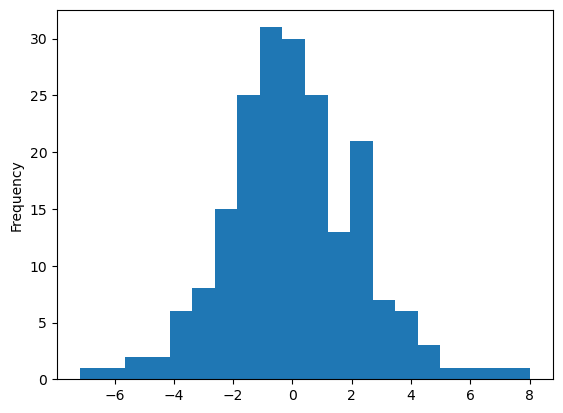

In [42]:
sim_df.score.plot.hist(bins=20)

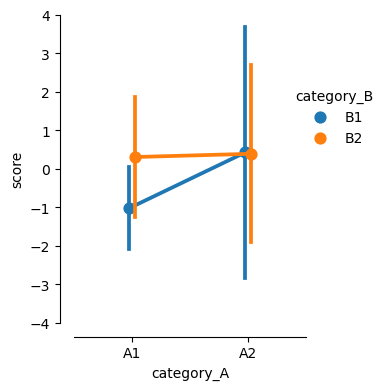

In [43]:
fig, ax =plt.subplots(figsize=(3,4))
ax = sns.pointplot(
    data=sim_df,
    y='score',
    x='category_A',
    hue='category_B',
    errorbar='sd',
    dodge=True,
    ax=ax
)

ax.set(ylim=(-4, 4))
ax.legend(bbox_to_anchor=[0.9, 0.8], title='category_B', frameon=False)
sns.despine(offset=10)

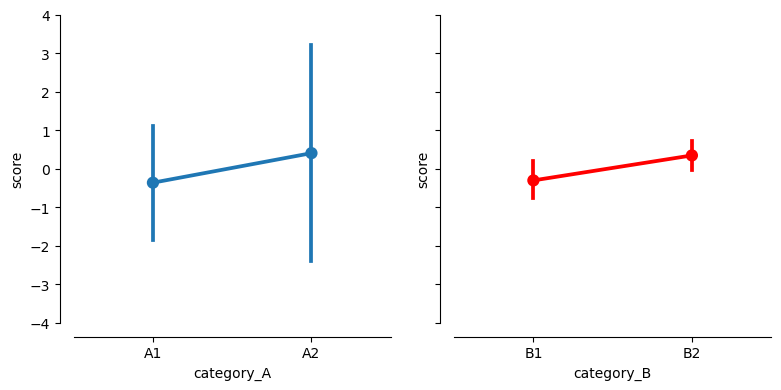

In [46]:
fig, ax =plt.subplots(1, 2, figsize=(9,4), sharey=True)
ax[0] = sns.pointplot(
    data=sim_df,
    y='score',
    x='category_A',
    errorbar='sd',
    dodge=True,
    ax=ax[0]
)

ax[1] = sns.pointplot(
    data=sim_df,
    y='score',
    x='category_B',
    errorbar=('ci', 95),
    dodge=True,
    ax=ax[1], 
    color='r'
)


ax[0].set(ylim=(-4, 4))
sns.despine(offset=10)

In [47]:
display(sim_df.score.agg(['mean', 'std']))

display(sim_df.groupby(['category_A']).score.agg(['mean', 'std']))

display(sim_df.groupby(['category_B']).score.agg(['mean', 'std']))

mean    0.023821
std     2.274154
Name: score, dtype: float64

,mean,std
category_A,,
A1,-0.360037,1.485519
A2,0.407680,2.809156


,mean,std
category_B,,
B1,-0.300776,2.524584
B2,0.348418,1.951773


## Parametric Methods of Testing Differences in Means

In [48]:
a1 = sim_df.query('category_A == "A1"').score
a2 = sim_df.query('category_A == "A2"').score

b1 = sim_df.query('category_B == "B1"').score
b2 = sim_df.query('category_B == "B2"').score

print(f'Ttest for differences between A1 and A2: {scipy.stats.ttest_ind(a1, a2)}')

print(f'Ttest for differences between B1 and B2: {scipy.stats.ttest_ind(b1, b2)}')

Ttest for differences between A1 and A2: Ttest_indResult(statistic=-2.4159102808695834, pvalue=0.01660377949444532)
Ttest for differences between B1 and B2: Ttest_indResult(statistic=-2.0344072815219105, pvalue=0.043244038378311034)


In [49]:
lm = ols('score ~ 1 + C(category_A, Sum) + C(category_B, Sum) + C(category_A, Sum):C(category_B, Sum)', data=sim_df).fit()
summary = sm.stats.anova_lm(lm, typ=2)
display(summary.round(3))

,sum_sq,df,F,PR(>F)
"C(category_A, Sum)",29.469,1.0,6.046,0.015
"C(category_B, Sum)",21.073,1.0,4.324,0.039
"C(category_A, Sum):C(category_B, Sum)",23.357,1.0,4.792,0.030
Residual,955.285,196.0,NaN,NaN


In [50]:
display(sim_df.score.agg(['mean', 'std']))

display(sim_df.groupby(['category_A']).score.agg(['mean', 'std']))

display(sim_df.groupby(['category_B']).score.agg(['mean', 'std']))

mean    0.023821
std     2.274154
Name: score, dtype: float64

,mean,std
category_A,,
A1,-0.360037,1.485519
A2,0.407680,2.809156


,mean,std
category_B,,
B1,-0.300776,2.524584
B2,0.348418,1.951773


In [24]:
-0.10 - 0.37

-0.47

In [27]:
-1.41/0.085

-16.588235294117645

In [51]:
display(lm.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     5.054
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00215
Time:                        11:19:46   Log-Likelihood:                -440.16
No. Observations:                 200   AIC:                             888.3
Df Residuals:                     196   BIC:                             901.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             0.0238      0.156      0.153      0.879      -0.284       0.332
C(category_A, Sum)[S.A1]                             -0.3839      0.156     -2.459      0.015      -0.692      -0.076
C(category_B, Sum)[S.B1]                             -0.3246      0.156     -2.079      0.039      -0.632      -0.017
C(category_A, Sum)[S.A1]:C(category_B, Sum)[S.B1]    -0.3417      0.156     -2.189      0.030      -0.650      -0.034
==============================================================================
Omnibus:                        8.626   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               15.147
Skew:                          -0.148   Prob(JB):                     0.000514
Kurtosis:                       4.315   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Non-Parametric Methods of Testing Difference in means

In [ ]:
Permutation Test

In [52]:
A_mean_diff = (
    sim_df.query('category_A=="A2"').score.mean() 
    - sim_df.query('category_A=="A1"').score.mean()
)

B_mean_diff = (
    sim_df.query('category_B=="B2"').score.mean() 
    - sim_df.query('category_B=="B1"').score.mean()
)

AB_diff = ( # (A1B1 - A1B2) - (A2B1 - A2B2)
    sim_df[(sim_df.category_A == 'A1') & (sim_df.category_B == 'B1')].score.mean()
    - sim_df[(sim_df.category_A == 'A1') & (sim_df.category_B == 'B2')].score.mean()
    - sim_df[(sim_df.category_A == 'A2') & (sim_df.category_B == 'B1')].score.mean()
    + sim_df[(sim_df.category_A == 'A2') & (sim_df.category_B == 'B2')].score.mean()
)

print(f'Diff in means of category A: {np.round(A_mean_diff, 3)}')
print(f'Diff in means of category B: {np.round(B_mean_diff, 3)}')
print(f'Diff of Diff of means of category A & B: {np.round(AB_diff, 3)}')

Diff in means of category A: 0.768
Diff in means of category B: 0.649
Diff of Diff of means of category A & B: -1.367


In [53]:
def permute_values(N=1000):
    A_pseudo_diff = []
    B_pseudo_diff = []
    AB_pseudo_diff = []
    
    for _ in range(N):
        sim_df['pseudo_score'] = np.random.permutation(sim_df.score)
        
        A_diff = (
            sim_df.query('category_A=="A2"').pseudo_score.mean() 
            - sim_df.query('category_A=="A1"').pseudo_score.mean()
        )
        A_pseudo_diff.append(A_diff)
        
        B_diff = (
            sim_df.query('category_B=="B2"').pseudo_score.mean() 
            - sim_df.query('category_B=="B1"').pseudo_score.mean()
        )
        B_pseudo_diff.append(B_diff)
        
        AB_diff = (
            sim_df[(sim_df.category_A == 'A1') & (sim_df.category_B == 'B1')].pseudo_score.mean()
            - sim_df[(sim_df.category_A == 'A1') & (sim_df.category_B == 'B2')].pseudo_score.mean()
            - sim_df[(sim_df.category_A == 'A2') & (sim_df.category_B == 'B1')].pseudo_score.mean()
            + sim_df[(sim_df.category_A == 'A2') & (sim_df.category_B == 'B2')].pseudo_score.mean()
        )
        AB_pseudo_diff.append(AB_diff)

        
    return np.array(A_pseudo_diff), np.array(B_pseudo_diff), np.array(AB_pseudo_diff)



A_pseudo_diff, B_pseudo_diff, AB_pseudo_diff = permute_values()

In [54]:
A_p_value = np.min([
    [np.mean(A_pseudo_diff > A_mean_diff), np.mean(A_pseudo_diff < A_mean_diff)]
])

B_p_value = np.min([
    [np.mean(B_pseudo_diff > B_mean_diff), np.mean(B_pseudo_diff < B_mean_diff)]
])

AB_p_value = np.min([
    [np.mean(AB_pseudo_diff > AB_diff), np.mean(AB_pseudo_diff < AB_diff)]
])

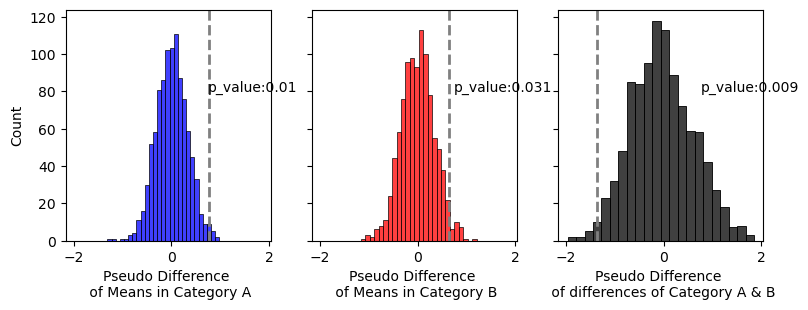

In [55]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex=True, sharey=True)

ax[0] = sns.histplot(data=A_pseudo_diff, color='b', ax=ax[0])
ax[0].axvline(A_mean_diff, color='grey', lw=2, ls='--')
ax[0].set(xlabel='Pseudo Difference \n of Means in Category A')
ax[0].text(0.75, 80, f'p_value:{A_p_value}')

ax[1] = sns.histplot(data=B_pseudo_diff, color='r', ax=ax[1])
ax[1].axvline(B_mean_diff, color='grey', lw=2, ls='--')
ax[1].set(xlabel='Pseudo Difference \n of Means in Category B')
ax[1].text(0.75, 80, f'p_value:{B_p_value}');

ax[2] = sns.histplot(data=AB_pseudo_diff, color='k', ax=ax[2])
ax[2].axvline(AB_diff, color='grey', lw=2, ls='--')
ax[2].set(xlabel='Pseudo Difference \n of differences of Category A & B')
ax[2].text(0.75, 80, f'p_value:{AB_p_value}');